## 1. Library Management

In [42]:
import cv2
import os
import pathlib
import numpy as np
from tabulate import tabulate
from glob import glob
import matplotlib.pyplot as plt

In [43]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing import image_dataset_from_directory, image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam, RMSprop, SGD, Adamax
from tensorflow.keras.losses import SparseCategoricalCrossentropy, CategoricalCrossentropy
from tensorflow.keras.models import load_model

In [44]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout, BatchNormalization

## 2. Data Sourcing

In [4]:
one_dir_up = os.path.split(os.getcwd())[0]
data_path = os.path.join(one_dir_up, "data")

In [5]:
train_image_data_path = os.path.join(data_path, "train")
test_image_data_path = os.path.join(data_path, "test")

In [6]:
train_list_ = []
for folder in os.listdir(train_image_data_path):
    folder_path = os.path.join(train_image_data_path, folder)
    for image_ in os.listdir(folder_path):
        image_path = os.path.join(folder_path, image_)
        dim = cv2.imread(image_path).shape
        train_list_.append(dim)

if len(set(train_list_)) > 1:
    print("Images are not of same size in TRAIN folder")
else:
    print("Images are of same size in TRAIN folder")
    print(f"Size of all images is {set(train_list_)}")

Images are of same size in TRAIN folder
Size of all images is {(48, 48, 3)}


In [7]:
test_list_ = []
for folder in os.listdir(test_image_data_path):
    folder_path = os.path.join(test_image_data_path, folder)
    for image_ in os.listdir(folder_path):
        image_path = os.path.join(folder_path, image_)
        dim = cv2.imread(image_path).shape
        test_list_.append(dim)

if len(set(test_list_)) > 1:
    print("Images are not of same size in TEST folder")
else:
    print("Images are of same size in TEST folder")
    print(f"Size of all images is {set(test_list_)}")

Images are of same size in TEST folder
Size of all images is {(48, 48, 3)}


## 3. Training CNN Model

### 3.1. Defining key parameters for CNN Model Training

In [28]:
batch_size = 32
epoch = 50
img_height = list(set(train_list_))[0][0]
img_width = list(set(train_list_))[0][1]
input_shape=(list(set(train_list_))[0])

### 3.2. Creating Data Generator for Train Class

In [10]:
train_ds = image_dataset_from_directory(
    train_image_data_path, 
    batch_size=batch_size, 
    image_size=(img_height, img_width),
    seed=314
)

Found 28709 files belonging to 7 classes.


In [11]:
class_names = train_ds.class_names
class_names

['angry', 'disgusted', 'fearful', 'happy', 'neutral', 'sad', 'surprised']

### 3.3. Creating Data Generator for Test Class

In [12]:
val_ds =image_dataset_from_directory(
    test_image_data_path, 
    batch_size=batch_size, 
    image_size=(img_height, img_width),
    seed=314
)

Found 7178 files belonging to 7 classes.


In [13]:
class_names = val_ds.class_names
class_names

['angry', 'disgusted', 'fearful', 'happy', 'neutral', 'sad', 'surprised']

### 3.4. Defining Model

In [23]:
model = Sequential([
    
    Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=input_shape),
    Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu'),
    MaxPool2D(pool_size=(2, 2), padding='same'),
    BatchNormalization(),
    Dropout(0.2),
    
    Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu'),
    Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu'),
    MaxPool2D(pool_size=(2, 2), padding='same'),
    BatchNormalization(),
    Dropout(0.2),
    
    Conv2D(128, kernel_size=(3, 3), padding='same', activation='relu'),
    Conv2D(128, kernel_size=(3, 3), padding='same', activation='relu'),
    MaxPool2D(pool_size=(2, 2), padding='same'),
    BatchNormalization(),
    Dropout(0.2),
    
    Conv2D(256, kernel_size=(3, 3), padding='same', activation='relu'),
    Conv2D(256, kernel_size=(3, 3), padding='same', activation='relu'),
    MaxPool2D(pool_size=(2, 2), padding='same'),
    BatchNormalization(),
    Dropout(0.2),
  
    Flatten(),
    Dense(512, activation='relu'),
    Dense(len(class_names), activation='softmax')
    
])

In [24]:
model.compile(
    optimizer='adam',
    loss=SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

In [25]:
# model.summary()

### 3.5. Training Model

In [26]:
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epoch
)

Epoch 1/50
898/898 [==============================] - 19s 20ms/step - loss: 1.6188 - accuracy: 0.3680 - val_loss: 1.7779 - val_accuracy: 0.3796
Epoch 2/50
898/898 [==============================] - 18s 20ms/step - loss: 1.3143 - accuracy: 0.4945 - val_loss: 1.3488 - val_accuracy: 0.4941
Epoch 3/50
898/898 [==============================] - 22s 24ms/step - loss: 1.2019 - accuracy: 0.5397 - val_loss: 1.2215 - val_accuracy: 0.5410
Epoch 4/50
898/898 [==============================] - 24s 27ms/step - loss: 1.1251 - accuracy: 0.5724 - val_loss: 1.1457 - val_accuracy: 0.5642
Epoch 5/50
898/898 [==============================] - 23s 26ms/step - loss: 1.0642 - accuracy: 0.5964 - val_loss: 1.1361 - val_accuracy: 0.5741
Epoch 6/50
898/898 [==============================] - 23s 25ms/step - loss: 1.0039 - accuracy: 0.6216 - val_loss: 1.1439 - val_accuracy: 0.5717
Epoch 7/50
898/898 [==============================] - 24s 27ms/step - loss: 0.9422 - accuracy: 0.6459 - val_loss: 1.1198 - val_accuracy:

### 3.6. Visualising Model Parameters

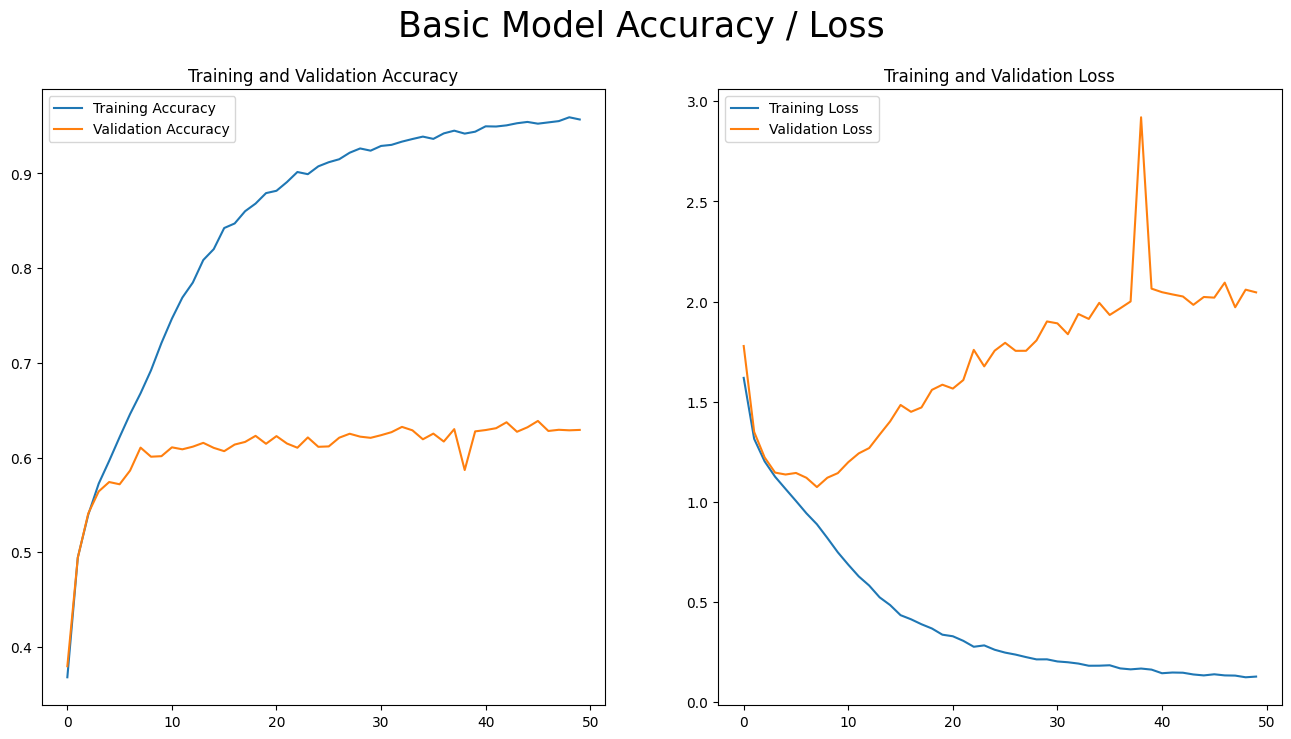

In [32]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epoch)

plt.figure(figsize=(16, 8))
plt.suptitle('Basic Model Accuracy / Loss',fontsize=25)

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='upper left')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper left')
plt.title('Training and Validation Loss')
plt.show()

### 3.7. Saving Model

In [33]:
h5_model_file_path = os.path.join(os.getcwd(), "model.h5")
model.save(h5_model_file_path)